# Coursera Capstone Project : Applied Data Science

## 1. Introduction

Opening cafes in metropolitans have been a favorite investment tool of investors for too long years now.

Likewise that, this business sector has been mostly chosen by the investors, but not all this investment story ends well.

## 2. Business Problem 

_"Especially, during the pandemic period(2019-2020-2021), 25% of cafes have closed due to economic reasons in Istanbul Turkey"_ said Kaya demirer who is the president of Tourism Restaurant Investors and Gastronomy Enterprises Associations.

Even though the pandemic effect is the main reason for this problem, even before the pandemic, in some neighbors, it is common to see owners of shops has been changed 4-5 times per year.

_'One of every two restaurants opened in Turkey closed in its first-year'_ said Korhan Erçin who is the sales director of Yemeksepeti.

Yemeksepeti is an online food delivery company and currently operates in 70 cities in Turkey and Cyprus, with more than 35,000 member restaurants, 18 million users, and 520,000 daily orders.


In my opinion, especially when taking into account development in Data Science tools and their application, it will be beneficial for future investors to observing cafe's and restaurants data from the perspective
of Data Scientist.

## 3.Data

To analyze cafe's in Istanbul we will need;

 * Neighbours in Istanbul
 * Longitude and Latitude of Istanbul's Neighbours
 * Restaurants and Cafe's in Istanbul's Neighbours and their Locations

Luckily, I've found the first two in the same CSV file in GitHub, after researching Istanbul's Neighbours data.
For the third, we will connect to the foursquare developers interface with developers API.

In [191]:

import pandas as pd 
from bs4 import BeautifulSoup
import requests 
import numpy as np # library to handle data in a vectorized manner

import matplotlib as mpl
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


# Getting and Cleaning Data

In [192]:
neighborhod = pd.read_html('https://en.wikipedia.org/wiki/List_of_districts_of_Istanbul')[0]
neighborhod = neighborhod.rename(columns={"District": "Neighborhood"})
neighborhod.drop(neighborhod.tail(4).index,inplace=True)
neighborhod = neighborhod.rename(columns={"Mensual household income TL(USD)": "monthly_income","Annual household income TL(USD)": "yearly_income"})
neighborhod[['montly_income_tl','montly_income_dollar']] = neighborhod.monthly_income.str.split('\(|\)', expand=True).iloc[:,[0,1]]
neighborhod[['yearly_income_tl','yearly_income_dollar']] = neighborhod.yearly_income.str.split('\(|\)', expand=True).iloc[:,[0,1]]
neighborhod = neighborhod.drop(columns="monthly_income")
neighborhod = neighborhod.drop(columns="yearly_income")
neighborhod.tail(5)

Neighborhood  Population (2020) Area (km²)  Density (per km²)  \
34        Şişli             266793      10.71              24911   
35        Tuzla             273608     123.63               2213   
36     Ümraniye             713803      45.31              15754   
37      Üsküdar             520771      35.33              14740   
38  Zeytinburnu             283657      11.59              24474   

   montly_income_tl montly_income_dollar yearly_income_tl yearly_income_dollar  
34          7.822₺                1,079$         93.864₺               12,955$  
35          3.407₺                  470$         40.884₺                5,643$  
36          3.637₺                  502$         43.641₺                6,023$  
37          6.987₺                  964$         83.839₺               11,572$  
38          3.644₺                  502$          6.036₺                6.036$

In [194]:
neighborhod2 = pd.read_csv("/Users/randyasfandy/Desktop/Data Science/Python/Python Scripts/ilce.csv")
neighborhod2 = neighborhod2.loc[neighborhod2['il_plaka']== 34]
neighborhod2 = neighborhod2[neighborhod2.columns[2:5]]
neighborhod2.head(4)

ilce_adi        lat        lon
415      ADALAR  40.876377  29.095444
416  ARNAVUTKÖY  41.200000  28.733333
417    ATAŞEHİR  40.983333  29.116667
418     AVCILAR  41.015348  28.731462

Two dataframe sorted alphabetically and they are in same order, because of that, we will add two column from neighborhod2 to neighborhod

In [195]:
neighborhod['lat'] = neighborhod2['lat'].values
neighborhod['lon'] = neighborhod2['lon'].values

In [196]:
neighborhod

Neighborhood  Population (2020) Area (km²)  Density (per km²)  \
0          Adalar              16033      11.05               1451   
1      Arnavutköy             296709     450.35                659   
2        Ataşehir             422594      25.23              16750   
3         Avcılar             436897      42.01              10400   
4        Bağcılar             737206      22.36              32970   
5    Bahçelievler             592371      16.62              35642   
6        Bakırköy             226229      29.64               7633   
7      Başakşehir             469924     104.30               4506   
8      Bayrampaşa             269950       9.61              28091   
9        Beşiktaş             176513      18.01               9801   
10         Beykoz             246110     310.36                793   
11     Beylikdüzü             365572      37.78               9676   
12        Beyoğlu             226396       8.91              25409   
13   Büyükçekmece             257362     139.17               1849   
14        Çatalca              74975    1115.13                 67   
15       Çekmeköy             273658     148.09               1848   
16        Esenler             446276      18.43              24215   
17       Esenyurt             957398      43.13              22198   
18     Eyüpsultan             405845     228.42               1777   
19          Fatih             396594      15.59              25439   
20  Gaziosmanpaşa             487778      11.76              41478   
21       Güngören             280299       7.21              38876   
22        Kadıköy             481983      25.09              19210   
23      Kağıthane             442415      14.87              29752   
24         Kartal             474514      38.54              12312   
25   Küçükçekmece             789633      37.54              21034   
26        Maltepe             515021      52.97               9723   
27         Pendik             726481     179.99               4036   
28     Sancaktepe             456861      62.42               7319   
29        Sarıyer             335298     175.39               1912   
30        Silivri             200215     869.52                230   
31    Sultanbeyli             343318      29.14              11782   
32     Sultangazi             537488      36.30              14807   
33           Şile              37904     781.72                 48   
34          Şişli             266793      10.71              24911   
35          Tuzla             273608     123.63               2213   
36       Ümraniye             713803      45.31              15754   
37        Üsküdar             520771      35.33              14740   
38    Zeytinburnu             283657      11.59              24474   

   montly_income_tl montly_income_dollar yearly_income_tl  \
0           6.652₺                  918$         79.821₺    
1           2.030₺                  279$         24.360₺    
2           6.577₺                  904$         78.924₺    
3           3.662₺                  503$         43.938₺    
4           3.197₺                  441$         38.367₺    
5           4.674₺                  645$         56.088₺    
6           8.845₺                1,220$        106.140₺    
7           4.513₺                  622$         54.152₺    
8           3.480₺                  480$         41.762₺    
9          10.560₺                1,457$        126.720₺    
10          3.693₺                  509$         44.316₺    
11          4.327₺                  597$         51.924₺    
12          4.773₺                  658$         57.275₺    
13          3.671₺                  506$         44.049₺    
14          2.128₺                  293$         25.536₺    
15          3.503₺                  483$         42.033₺    
16          2.847₺                  392$         34.164₺    
17          3.024₺                  417$         36.288₺    
18          4.670₺                  644$     

In [197]:
neighborhod['montly_income_tl'] = neighborhod['montly_income_tl'].str.replace('₺', '').astype(float)
montly_income = neighborhod[['montly_income_tl', 'Neighborhood']]
montly_income = montly_income.sort_values('montly_income_tl')
montly_income.tail(5)

montly_income_tl Neighborhood
29             7.308      Sarıyer
34             7.822        Şişli
6              8.845     Bakırköy
22             9.025      Kadıköy
9             10.560     Beşiktaş

In [198]:
density = neighborhod[['montly_income_tl', 'Density (per km²)', 'Neighborhood']]
density = density.sort_values('montly_income_tl')
density.tail(5)

montly_income_tl  Density (per km²) Neighborhood
29             7.308               1912      Sarıyer
34             7.822              24911        Şişli
6              8.845               7633     Bakırköy
22             9.025              19210      Kadıköy
9             10.560               9801     Beşiktaş

In [199]:
istanbuls_data = neighborhod

# Visualization of Data 

In [200]:
address = 'İstanbul'

geolocator = Nominatim(user_agent="ist_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of İstanbul are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of İstanbul are 41.0096334, 28.9651646.


In [202]:
# create map of Toronto using latitude and longitude values
map_istanbul = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lon, Neighborhood in zip(neighborhod['lat'], neighborhod['lon'], neighborhod['Neighborhood']):
    label = '{}, {}'.format(lat, lon)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_istanbul)  
    
map_istanbul

In [212]:
montly_income.head()


montly_income_tl Neighborhood
1              2.030   Arnavutköy
14             2.128      Çatalca
31             2.172  Sultanbeyli
32             2.187   Sultangazi
30             2.372      Silivri

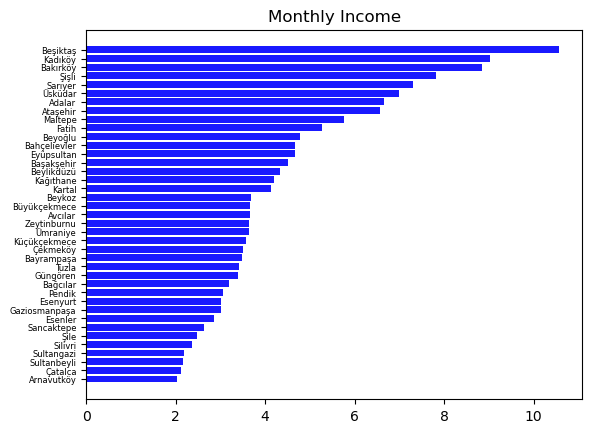

<Figure size 5000x15000 with 0 Axes>

In [215]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = montly_income.Neighborhood
y_pos = np.arange(len(objects))
performance = montly_income.montly_income_tl

plt.barh(y_pos, performance, align='center', alpha=0.9, color = 'blue')
plt.yticks(y_pos, objects,fontsize=6)
plt.title('Monthly Income')
plt.figure(figsize=(50,150)) 
plt.show()

# Getting the venues for Neighbourhood of Bakırköy


In [216]:
CLIENT_ID = 'TPNYRTVHIDRISAYMQ3AKS0ZECVZS5MNSVWOXAIDU0YX52VZ5' # your Foursquare ID
CLIENT_SECRET = 'SLC2CWBMAFCIWGTRMI45SUK5IWPIC3JMIRFALGEMVBUUYJQE' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 1000 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: TPNYRTVHIDRISAYMQ3AKS0ZECVZS5MNSVWOXAIDU0YX52VZ5
CLIENT_SECRET:SLC2CWBMAFCIWGTRMI45SUK5IWPIC3JMIRFALGEMVBUUYJQE


In [217]:
neighborhood_latitude = istanbuls_data.loc[6, 'lat'] # neighborhood latitude value
neighborhood_longitude = istanbuls_data.loc[6, 'lon'] # neighborhood longitude value

neighborhood_name = istanbuls_data.loc[6, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Bakırköy are 40.968155, 28.8228.


In [218]:
radius = 1000
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '60e9ac58bf7a442b7bcc7b9b'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Yeşılköy',
  'headerFullLocation': 'Yeşılköy, Istanbul',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 72,
  'suggestedBounds': {'ne': {'lat': 40.977155009000015,
    'lng': 28.834697117035013},
   'sw': {'lat': 40.95915499099999, 'lng': 28.81090288296499}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '5c9801ad3fcee8002c93a904',
       'name': 'Game of Lokma Yeşilköy İstasyon Cd.',
       'location': {'address': 'Yeşilköy Mah. İstasyon Cad. No; 1/44',
        'crossStreet': 'İstasyon Cad.',
        'lat': 40.961909909717,
        'lng': 28.824826105

In [219]:
venues = results['response']['groups'][0]['items']
venues_df = json_normalize(venues) # flatten JSON
venues_df.head(5)

<ipython-input-219-d42cc5640a36>:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  venues_df = json_normalize(venues) # flatten JSON


referralId  reasons.count  \
0  e-0-5c9801ad3fcee8002c93a904-0              0   
1  e-0-5b3dd928b3d8e2002c3973e8-1              0   
2  e-0-4d173e388312236a839f5cba-2              0   
3  e-0-50202ca2e4b08c6a8ee7213d-3              0   
4  e-0-55d0ebe5498eba4db3759a29-4              0   

                                       reasons.items  \
0  [{'summary': 'This spot is popular', 'type': '...   
1  [{'summary': 'This spot is popular', 'type': '...   
2  [{'summary': 'This spot is popular', 'type': '...   
3  [{'summary': 'This spot is popular', 'type': '...   
4  [{'summary': 'This spot is popular', 'type': '...   

                   venue.id                           venue.name  \
0  5c9801ad3fcee8002c93a904  Game of Lokma Yeşilköy İstasyon Cd.   
1  5b3dd928b3d8e2002c3973e8                    240 Derece Dükkan   
2  4d173e388312236a839f5cba                     Havacılık Müzesi   
3  50202ca2e4b08c6a8ee7213d                     Yeşilköy Meydanı   
4  55d0ebe5498eba4db3759a29             Davidofff Gusto Yeşilköy   

                      venue.location.address venue.location.crossStreet  \
0       Yeşilköy Mah. İstasyon Cad. No; 1/44              İstasyon Cad.   
1  Yeşilköy Mahallesi İstasyon Caddesi No:9A   Yeşilköy Halkalı Caddesi   
2                Eski Havaalanı Cd. Yeşilköy                        NaN   
3                                   Yeşilköy                        NaN   
4                                        NaN                        NaN   

   venue.location.lat  venue.location.lng  \
0           40.961910           28.824826   
1           40.961524           28.824736   
2           40.963299           28.826233   
3           40.961125           28.825126   
4           40.962330           28.824719   

                       venue.location.labeledLatLngs  venue.location.distance  \
0  [{'label': 'display', 'lat': 40.961909909717, ...                      715   
1  [{'label': 'display', 'lat': 40.96152374202112...                      755   
2  [{'label': 'display', 'lat': 40.96329893525252...                      612   
3  [{'label': 'display', 'lat': 40.96112489792431...                      806   
4  [{'label': 'display', 'lat': 40.9623298565536,...                      668   

  venue.location.postalCode venue.location.cc venue.location.city  \
0                     34149                TR            İstanbul   
1                       NaN                TR            İstanbul   
2                     34149                TR            İstanbul   
3                       NaN                TR            Bakırköy   
4                       NaN                TR                 NaN   

  venue.location.state venue.location.country  \
0             Yeşilköy                Türkiye   
1             YEŞİLKÖY                Türkiye   
2             İstanbul                Türkiye   
3             İstanbul                Türkiye   
4                  NaN                Türkiye   

                     venue.location.formattedAddress  \
0  [Yeşilköy Mah. İstasyon Cad. No; 1/44 (İstasyo...   
1  [Yeşilköy Mahallesi İstasyon Caddesi No:9A (Ye...   
2  [Eski Havaalanı Cd. Yeşilköy, 34149 İstanbul, ...   
3                      [Yeşilköy, Bakırköy, Türkiye]   
4                                          [Türkiye]   

                                    venue.categories  venue.photos.count  \
0  [{'id': '4bf58dd8d48988d1d0941735', 'name': 'D...                   0   
1  [{'id': '4bf58dd8d48988d143941735', 'name': 'B...                   0   
2  [{'id': '4bf58dd8d48988d181941735', 'name': 'M...                   0   
3  [{'id': '4bf58dd8d48988d164941735', 'name': 'P...                   0   
4  [{'id': '4bf58dd8d48988d16d941735', 'name': 'C...                   0   

  venue.photos.groups venue.venuePage.id venue.location.neighborhood  
0                  []                NaN                         NaN  
1                  []                NaN                         NaN  
2                  []                N

In [220]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [153]:
# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
venues_df =venues_df.loc[:, filtered_columns]

# filter the category for each row
venues_df['venue.categories'] = venues_df.apply(get_category_type, axis=1)

# clean columns
venues_df.columns = [col.split(".")[-1] for col in venues_df.columns]

venues_df.head()

name      categories        lat        lng
0  Game of Lokma Yeşilköy İstasyon Cd.    Dessert Shop  40.961910  28.824826
1                    240 Derece Dükkan  Breakfast Spot  40.961524  28.824736
2                     Havacılık Müzesi          Museum  40.963299  28.826233
3                     Yeşilköy Meydanı           Plaza  40.961125  28.825126
4             Davidofff Gusto Yeşilköy            Café  40.962330  28.824719

In [221]:
print('{} venues were returned by Foursquare.'.format(venues_df.shape[0]))

72 venues were returned by Foursquare.


In [222]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [223]:
istanbul_venues = getNearbyVenues(names=istanbuls_data['Neighborhood'],
                                   latitudes=istanbuls_data['lat'],
                                longitudes=istanbuls_data['lon']
                           )

Adalar
Arnavutköy
Ataşehir
Avcılar
Bağcılar
Bahçelievler
Bakırköy
Başakşehir
Bayrampaşa
Beşiktaş
Beykoz
Beylikdüzü
Beyoğlu
Büyükçekmece
Çatalca
Çekmeköy
Esenler
Esenyurt
Eyüpsultan
Fatih
Gaziosmanpaşa
Güngören
Kadıköy
Kağıthane
Kartal
Küçükçekmece
Maltepe
Pendik
Sancaktepe
Sarıyer
Silivri
Sultanbeyli
Sultangazi
Şile
Şişli
Tuzla
Ümraniye
Üsküdar
Zeytinburnu


In [224]:
istanbul_venues.head(10)

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0       Adalar              40.876377               29.095444   
1       Adalar              40.876377               29.095444   
2       Adalar              40.876377               29.095444   
3       Adalar              40.876377               29.095444   
4       Adalar              40.876377               29.095444   
5       Adalar              40.876377               29.095444   
6       Adalar              40.876377               29.095444   
7       Adalar              40.876377               29.095444   
8       Adalar              40.876377               29.095444   
9       Adalar              40.876377               29.095444   

                            Venue  Venue Latitude  Venue Longitude  \
0              L'isola Guesthouse       40.877038        29.096136   
1                İnönü Evi Müzesi       40.878251        29.093647   
2                        Luz Café       40.877528        29.097877   
3                  Farkli Bi' Yer       40.876581        29.100965   
4             Erguvan Evyemekleri       40.876864        29.100745   
5  Heybeliada Şafak Askeri Gazino       40.873609        29.099478   
6                       Ezop Cafe       40.877636        29.098250   
7        Merit Halki Palace Hotel       40.878802        29.090974   
8               Heybeliada Sahili       40.878120        29.100270   
9                       Kayıkhane       40.877635        29.099838   

       Venue Category  
0     Bed & Breakfast  
1      History Museum  
2                Café  
3                Café  
4  Turkish Restaurant  
5          Restaurant  
6                Café  
7               Hotel  
8          Waterfront  
9  Seafood Restaurant

In [225]:
istanbul_venues.shape

(2803, 7)

In [226]:
address = 'Istanbul'

geolocator = Nominatim(user_agent="ist_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Istanbul are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Istanbul are 41.0096334, 28.9651646.


In [227]:
# create map of Bakırköy using latitude and longitude values
map_istanbul_venues = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lon, ilce in zip(istanbul_venues['Venue Latitude'], istanbul_venues['Venue Longitude'], istanbul_venues['Venue Category']):
    label = '{}, {}'.format(lat, lon)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_istanbul_venues)  
    
map_istanbul_venues

In [228]:
istanbul_venues.groupby('Venue Category').count()

Neighborhood  Neighborhood Latitude  \
Venue Category                                                                  
Afghan Restaurant                                    1                      1   
Airport Terminal                                     1                      1   
American Restaurant                                  4                      4   
Antique Shop                                         2                      2   
Aquarium                                             1                      1   
Arcade                                              25                     25   
Arepa Restaurant                                     1                      1   
Argentinian Restaurant                               1                      1   
Art Gallery                                         14                     14   
Art Museum                                           3                      3   
Arts & Crafts Store                                  8                      8   
Arts & Entertainment                                 4                      4   
Asian Restaurant                                     3                      3   
Athletics & Sports                                  17                     17   
Auto Garage                                         10                     10   
Automotive Shop                                      1                      1   
BBQ Joint                                            8                      8   
Baby Store                                           2                      2   
Bagel Shop                                          16                     16   
Bakery                                              68                     68   
Bar                                                 20                     20   
Basketball Court                                     3                      3   
Basketball Stadium                                   3                      3   
Bath House                                           1                      1   
Bathing Area                                         2                      2   
Bay                                                  1                      1   
Beach                                               22                     22   
Bed & Breakfast                                      2                      2   
Beer Garden                                          9                      9   
Betting Shop                                         1                      1   
Big Box Store                                        7                      7   
Bike Rental / Bike Share                             1                      1   
Bike Trail                                           1                      1   
Bistro                                               5                      5   
Boarding House                                       2                      2   
Boat or Ferry                                       10                     10   
Bookstore                                           18                     18   
Borek Place                                         12                     12   
Botanical Garden                                     2                      2   
Boutique                                             9                      9   
Bowling Alley                                        2                      2   
Breakfast Spot                                      31                     31   
Brewery                                              1                      1   
Buffet                                               9                      9   
Building                                             4                      4   
Burger Joint                                        18                     18   
Burrito Place                                        1                      1   
Bus Station                                          4                   

In [229]:
print('There are {} uniques categories.'.format(len(istanbul_venues['Venue Category'].unique())))

There are 294 uniques categories.


# Analyze neighborhods

In [230]:
# one hot encoding
istanbul_onehot = pd.get_dummies(istanbul_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
istanbul_onehot['Neighborhood'] = istanbul_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [istanbul_onehot.columns[-1]] + list(istanbul_onehot.columns[:-1])
istanbul_onehot = istanbul_onehot[fixed_columns]

istanbul_onehot.head()

Neighborhood  Afghan Restaurant  Airport Terminal  American Restaurant  \
0       Adalar                  0                 0                    0   
1       Adalar                  0                 0                    0   
2       Adalar                  0                 0                    0   
3       Adalar                  0                 0                    0   
4       Adalar                  0                 0                    0   

   Antique Shop  Aquarium  Arcade  Arepa Restaurant  Argentinian Restaurant  \
0             0         0       0                 0                       0   
1             0         0       0                 0                       0   
2             0         0       0                 0                       0   
3             0         0       0                 0                       0   
4             0         0       0                 0                       0   

   Art Gallery  Art Museum  Arts & Crafts Store  Arts & Entertainment  \
0            0           0                    0                     0   
1            0           0                    0                     0   
2            0           0                    0                     0   
3            0           0                    0                     0   
4            0           0                    0                     0   

   Asian Restaurant  Athletics & Sports  Auto Garage  Automotive Shop  \
0                 0                   0            0                0   
1                 0                   0            0                0   
2                 0                   0            0                0   
3                 0                   0            0                0   
4                 0                   0            0                0   

   BBQ Joint  Baby Store  Bagel Shop  Bakery  Bar  Basketball Court  \
0          0           0           0       0    0                 0   
1          0           0           0       0    0                 0   
2          0           0           0       0    0                 0   
3          0           0           0       0    0                 0   
4          0           0           0       0    0                 0   

   Basketball Stadium  Bath House  Bathing Area  Bay  Beach  Bed & Breakfast  \
0                   0           0             0    0      0                1   
1                   0           0             0    0      0                0   
2                   0           0             0    0      0                0   
3                   0           0             0    0      0                0   
4                   0           0             0    0      0                0   

   Beer Garden  Betting Shop  Big Box Store  Bike Rental / Bike Share  \
0            0             0              0                         0   
1            0             0              0                         0   
2            0             0              0                         0   
3            0             0              0                         0   
4            0             0              0                         0   

   Bike Trail  Bistro  Boarding House  Boat or Ferry  Bookstore  Borek Place  \
0           0       0               0              0          0            0   
1           0       0               0              0          0            0   
2           0       0               0              0          0            0   
3           0       0               0              0          0            0   
4           0       0               0              0          0            0   

   Botanical Garden  Boutique  Bowling Alley  Breakfast Spot  Brewery  Buffet  \
0                 0         0              0               0        0       0   
1                 0         0              0               0        0       0   
2                 0         0              0               0        0       0   
3                 0         0           

In [231]:
istanbul_grouped = istanbul_onehot.groupby('Neighborhood').mean().reset_index()
istanbul_grouped.head(5)

Neighborhood  Afghan Restaurant  Airport Terminal  American Restaurant  \
0        Adalar                0.0               0.0                  0.0   
1    Arnavutköy                0.0               0.0                  0.0   
2      Ataşehir                0.0               0.0                  0.0   
3       Avcılar                0.0               0.0                  0.0   
4  Bahçelievler                0.0               0.0                  0.0   

   Antique Shop  Aquarium    Arcade  Arepa Restaurant  Argentinian Restaurant  \
0           0.0       0.0  0.000000               0.0                     0.0   
1           0.0       0.0  0.058824               0.0                     0.0   
2           0.0       0.0  0.000000               0.0                     0.0   
3           0.0       0.0  0.000000               0.0                     0.0   
4           0.0       0.0  0.000000               0.0                     0.0   

   Art Gallery  Art Museum  Arts & Crafts Store  Arts & Entertainment  \
0          0.0         0.0                  0.0              0.000000   
1          0.0         0.0                  0.0              0.029412   
2          0.0         0.0                  0.0              0.000000   
3          0.0         0.0                  0.0              0.000000   
4          0.0         0.0                  0.0              0.000000   

   Asian Restaurant  Athletics & Sports  Auto Garage  Automotive Shop  \
0               0.0            0.010101          0.0              0.0   
1               0.0            0.000000          0.0              0.0   
2               0.0            0.000000          0.0              0.0   
3               0.0            0.000000          0.0              0.0   
4               0.0            0.000000          0.0              0.0   

   BBQ Joint  Baby Store  Bagel Shop    Bakery       Bar  Basketball Court  \
0   0.010101         0.0        0.00  0.030303  0.020202               0.0   
1   0.000000         0.0        0.00  0.029412  0.000000               0.0   
2   0.000000         0.0        0.00  0.030000  0.010000               0.0   
3   0.000000         0.0        0.00  0.000000  0.000000               0.0   
4   0.000000         0.0        0.01  0.030000  0.000000               0.0   

   Basketball Stadium  Bath House  Bathing Area  Bay     Beach  \
0                0.00         0.0           0.0  0.0  0.060606   
1                0.00         0.0           0.0  0.0  0.000000   
2                0.01         0.0           0.0  0.0  0.000000   
3                0.00         0.0           0.0  0.2  0.000000   
4                0.00         0.0           0.0  0.0  0.000000   

   Bed & Breakfast  Beer Garden  Betting Shop  Big Box Store  \
0         0.020202          0.0           0.0       0.000000   
1         0.000000          0.0           0.0       0.029412   
2         0.000000          0.0           0.0       0.000000   
3         0.000000          0.0           0.0       0.000000   
4         0.000000          0.0           0.0       0.000000   

   Bike Rental / Bike Share  Bike Trail  Bistro  Boarding House  \
0                       0.0    0.010101    0.00             0.0   
1                       0.0    0.000000    0.00             0.0   
2                       0.0    0.000000    0.01             0.0   
3                       0.0    0.000000    0.00             0.0   
4                       0.0    0.000000    0.00             0.0   

   Boat or Ferry  Bookstore  Borek Place  Botanical Garden  Boutique  \
0       0.040404   0.010101          0.0               0.0       0.0   
1       0.000000   0.000000          0.0               0.0       0.0   
2       0.000000   0.000000          0.0               0.0       0.0   
3       0.000000   0.000000          0.0               0.0       0.0   
4       0.000000   0.000000          0.0               0.0       0.0   

   Bowling Alley  Breakfast Spot  Brewery  Buffet  Building  Burger Joint  \
0          

In [232]:
num_top_venues = 5

for hood in istanbul_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = istanbul_grouped[istanbul_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adalar----
                venue  freq
0                Café  0.18
1  Seafood Restaurant  0.11
2               Beach  0.06
3       Boat or Ferry  0.04
4              Bakery  0.03


----Arnavutköy----
               venue  freq
0         Restaurant  0.18
1               Farm  0.09
2             Arcade  0.06
3        Pastry Shop  0.06
4  Electronics Store  0.06


----Ataşehir----
                venue  freq
0                Café  0.10
1          Restaurant  0.09
2  Seafood Restaurant  0.06
3    Kebab Restaurant  0.05
4         Coffee Shop  0.04


----Avcılar----
            venue  freq
0            Lake   0.2
1    Outlet Store   0.2
2             Bay   0.2
3            Café   0.2
4  Clothing Store   0.2


----Bahçelievler----
                venue  freq
0                Café  0.24
1  Turkish Restaurant  0.07
2          Steakhouse  0.03
3              Bakery  0.03
4        Dessert Shop  0.03


----Bakırköy----
                venue  freq
0                Café  0.10
1  Turkish Restaura

In [233]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [234]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = istanbul_grouped['Neighborhood']

for ind in np.arange(istanbul_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(istanbul_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0          Adalar                  Café    Seafood Restaurant   
1      Arnavutköy            Restaurant                  Farm   
2        Ataşehir                  Café            Restaurant   
3         Avcılar                  Lake          Outlet Store   
4    Bahçelievler                  Café    Turkish Restaurant   
5        Bakırköy                  Café    Turkish Restaurant   
6      Bayrampaşa                  Café        Clothing Store   
7        Bağcılar                  Café    Turkish Restaurant   
8      Başakşehir           Auto Garage          Dessert Shop   
9          Beykoz                  Café            Restaurant   
10     Beylikdüzü                  Café                   Gym   
11        Beyoğlu                 Hotel                   Bar   
12       Beşiktaş                   Gym            Restaurant   
13   Büyükçekmece          Soccer Field    Athletics & Sports   
14        Esenler            Bagel Shop       Paintball Field   
15       Esenyurt                  Café            Restaurant   
16     Eyüpsultan                  Café        Ice Cream Shop   
17          Fatih                  Café    Turkish Restaurant   
18  Gaziosmanpaşa                  Café    Turkish Restaurant   
19       Güngören        Clothing Store    Turkish Restaurant   
20        Kadıköy                  Café                  Park   
21         Kartal    Turkish Restaurant                  Café   
22      Kağıthane                  Café    Turkish Restaurant   
23   Küçükçekmece                  Café     Electronics Store   
24        Maltepe                  Café                  Pool   
25         Pendik                  Café                Bakery   
26     Sancaktepe         Big Box Store                 Plaza   
27        Sarıyer                  Café    Seafood Restaurant   
28        Silivri     Convenience Store                  Park   
29    Sultanbeyli                  Café    Turkish Restaurant   
30     Sultangazi            Whisky Bar                  Farm   
31          Tuzla                  Café            Steakhouse   
32    Zeytinburnu                  Café            Restaurant   
33        Çatalca                  Café            Restaurant   
34       Çekmeköy                  Farm            Steakhouse   
35       Ümraniye                  Café           Coffee Shop   
36        Üsküdar                  Café                  Park   
37           Şile                 Beach    Seafood Restaurant   
38          Şişli           Coffee Shop                  Café   

     3rd Most Common Venue       4th Most Common Venue  \
0                    Beach               Boat or Ferry   
1                   Arcade                 Pastry Shop   
2       Seafood Restaurant            Kebab Restaurant   
3                      Bay                        Café   
4               Steakhouse                      Bakery   
5               Restaurant              Breakfast Spot   
6             Dessert Shop         Sporting Goods Shop   
7                   Arcade                        Park   
8           Clothing Store          Turkish Restaurant   
9            Shopping Mall              Scenic Lookout   
10                    Pool                  Restaurant   
11                    Café                  Restaurant   
12                    Café              Clothing Store   
13                    Tree             Harbor / Marina   
14               BBQ Joint                Burger Joint   
15       Mobile Phone Shop               Shopping Mall   
16            Dessert Shop                        Lake   
17                   Hotel                         Gym   
18                     Gym                 Art Gallery   
19        Department Store                  Restaurant   
20          Ice Cream Shop        Gym / Fitness Center   
21              Steakhouse                         Gym   
22                  Bakery              Breakfast Spot   
23       Con

In [177]:
neighborhoods_venues_sorted.head(10)

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0        Adalar                  Café    Seafood Restaurant   
1    Arnavutköy            Restaurant                  Farm   
2      Ataşehir                  Café            Restaurant   
3       Avcılar                  Lake          Outlet Store   
4  Bahçelievler                  Café    Turkish Restaurant   
5      Bakırköy                  Café    Turkish Restaurant   
6    Bayrampaşa                  Café        Clothing Store   
7      Bağcılar                  Café    Turkish Restaurant   
8    Başakşehir           Auto Garage          Dessert Shop   
9        Beykoz                  Café            Restaurant   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0                 Beach         Boat or Ferry                Bakery   
1                Arcade           Pastry Shop     Electronics Store   
2    Seafood Restaurant      Kebab Restaurant           Coffee Shop   
3                   Bay                  Café        Clothing Store   
4            Steakhouse                Bakery          Dessert Shop   
5            Restaurant        Breakfast Spot           Manti Place   
6          Dessert Shop   Sporting Goods Shop            Restaurant   
7                Arcade                  Park     Mobile Phone Shop   
8        Clothing Store    Turkish Restaurant           Kofte Place   
9         Shopping Mall        Scenic Lookout    Seafood Restaurant   

  6th Most Common Venue 7th Most Common Venue  8th Most Common Venue  \
0                  Pool    Turkish Restaurant        Harbor / Marina   
1         Shopping Mall      Department Store        Nature Preserve   
2            Steakhouse                  Pool                 Bakery   
3                  Park       Paintball Field  Outdoors & Recreation   
4            Restaurant       Motorcycle Shop                  Hotel   
5          Dessert Shop                  Pool                   Park   
6  Gym / Fitness Center    Turkish Restaurant         Breakfast Spot   
7              Tea Room            Steakhouse                  Plaza   
8      Department Store            Restaurant            Coffee Shop   
9                  Farm  Fast Food Restaurant                  Plaza   

     9th Most Common Venue           10th Most Common Venue  
0               Restaurant                       Steakhouse  
1                Cafeteria                           Bakery  
2                     Park                  Motorcycle Shop  
3      Outdoor Event Space                Other Repair Shop  
4  Comfort Food Restaurant  Turkish Home Cooking Restaurant  
5            Deli / Bodega             Gym / Fitness Center  
6                     Park                   Cosmetics Shop  
7        Electronics Store                           Bakery  
8     Gym / Fitness Center                       Steakhouse  
9  Comfort Food Restaurant                      Golf Course

# Cluster Neighborhoods

In [255]:
# set number of clusters
kclusters = 6

istanbul_grouped_clustering = istanbul_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(istanbul_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 1, 4, 1, 1, 1, 1, 1, 1], dtype=int32)

In [256]:
# add clustering labels
neighborhoods_venues_sorted['Cluster_Labels']=  kmeans.labels_

istanbul_merged = istanbuls_data

# merge top venues_sorted with etobicoke_data

istanbul_merged = istanbul_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

istanbul_merged_last = istanbul_merged.drop([0], axis =0)

In [257]:
istanbul_merged_last.head(5)

Neighborhood  Population (2020) Area (km²)  Density (per km²)  \
1    Arnavutköy             296709     450.35                659   
2      Ataşehir             422594      25.23              16750   
3       Avcılar             436897      42.01              10400   
4      Bağcılar             737206      22.36              32970   
5  Bahçelievler             592371      16.62              35642   

   montly_income_tl montly_income_dollar yearly_income_tl  \
1             2.030                 279$         24.360₺    
2             6.577                 904$         78.924₺    
3             3.662                 503$         43.938₺    
4             3.197                 441$         38.367₺    
5             4.674                 645$         56.088₺    

  yearly_income_dollar        lat        lon 1st Most Common Venue  \
1               3,350$  41.200000  28.733333            Restaurant   
2              10,854$  40.983333  29.116667                  Café   
3               6,064$  41.015348  28.731462                  Lake   
4               5,295$  41.045556  28.840556                  Café   
5               7,741$  40.997500  28.850556                  Café   

  2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
1                  Farm                Arcade           Pastry Shop   
2            Restaurant    Seafood Restaurant      Kebab Restaurant   
3          Outlet Store                   Bay                  Café   
4    Turkish Restaurant                Arcade                  Park   
5    Turkish Restaurant            Steakhouse                Bakery   

  5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
1     Electronics Store         Shopping Mall      Department Store   
2           Coffee Shop            Steakhouse                  Pool   
3        Clothing Store                  Park       Paintball Field   
4     Mobile Phone Shop              Tea Room            Steakhouse   
5          Dessert Shop            Restaurant       Motorcycle Shop   

   8th Most Common Venue    9th Most Common Venue  \
1        Nature Preserve                Cafeteria   
2                 Bakery                     Park   
3  Outdoors & Recreation      Outdoor Event Space   
4                  Plaza        Electronics Store   
5                  Hotel  Comfort Food Restaurant   

            10th Most Common Venue  Cluster_Labels  
1                           Bakery               1  
2                  Motorcycle Shop               1  
3                Other Repair Shop               4  
4                           Bakery               1  
5  Turkish Home Cooking Restaurant               1

In [258]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(istanbul_merged['lat'], istanbul_merged['lon'], istanbul_merged['Neighborhood'], istanbul_merged['Cluster_Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# Cluster 1- Çekmeköy

In [259]:
istanbul_merged.loc[istanbul_merged['Cluster_Labels'] == 0, istanbul_merged.columns[[1] + list(range(5, istanbul_merged.shape[1]))]]

Population (2020) montly_income_dollar yearly_income_tl  \
15             273658                 483$         42.033₺    

   yearly_income_dollar        lat        lon 1st Most Common Venue  \
15               5,801$  41.104235  29.317727                  Farm   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
15            Steakhouse                 Hotel                Garden   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
15                  Lake               Dog Run    Athletics & Sports   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  \
15                Forest           Kofte Place            Wings Joint   

    Cluster_Labels  
15               0

In [265]:
istanbul_merged_last['Neighborhood'][15]

'Çekmeköy'

# Cluster 2

In [266]:
istanbul_merged.loc[istanbul_merged['Cluster_Labels'] == 1, istanbul_merged.columns[[1] + list(range(5, istanbul_merged.shape[1]))]]

Population (2020) montly_income_dollar yearly_income_tl  \
0               16033                 918$         79.821₺    
1              296709                 279$         24.360₺    
2              422594                 904$         78.924₺    
4              737206                 441$         38.367₺    
5              592371                 645$         56.088₺    
6              226229               1,220$        106.140₺    
7              469924                 622$         54.152₺    
8              269950                 480$         41.762₺    
9              176513               1,457$        126.720₺    
10             246110                 509$         44.316₺    
11             365572                 597$         51.924₺    
12             226396                 658$         57.275₺    
13             257362                 506$         44.049₺    
14              74975                 293$         25.536₺    
17             957398                 417$         36.288₺    
18             405845                 644$         56.044₺    
19             396594                 728$         63.378₺    
20             487778                 416$         36.228₺    
21             280299                 467$         40.656₺    
22             481983               1,245$        108.300₺    
23             442415                 578$         50.260₺    
24             474514                 568$         49.443₺    
25             789633                 492$         42.804₺    
26             515021                 796$         69.259₺    
27             726481                 421$         36.664₺    
29             335298               1,008$         87.696₺    
30             200215                 327$         28.464₺    
31             343318                 299$         26.064₺    
33              37904                 342$         29.789₺    
34             266793               1,079$         93.864₺    
35             273608                 470$         40.884₺    
36             713803                 502$         43.641₺    
37             520771                 964$         83.839₺    
38             283657                 502$          6.036₺    

   yearly_income_dollar        lat        lon 1st Most Common Venue  \
0               10,978$  40.876377  29.095444                  Café   
1                3,350$  41.200000  28.733333            Restaurant   
2               10,854$  40.983333  29.116667                  Café   
4                5,295$  41.045556  28.840556                  Café   
5                7,741$  40.997500  28.850556                  Café   
6               14,650$  40.968155  28.822800                  Café   
7                7,474$  41.077895  28.812551           Auto Garage   
8                5,764$  41.048150  28.900455                  Café   
9               17,490$  41.068616  29.028536                   Gym   
10               6,116$  41.132719  29.105690                  Café   
11               7,166$  40.991038  28.649814                  Café   
12               7,905$  41.038286  28.970330                 Hotel   
13               6,079$  41.034133  28.590003          Soccer Field   
14               3,524$  41.148239  28.467730                  Café   
17               5,008$  41.034281  28.680119                  Café   
18               7,735$  41.187160  28.882982                  Café   
19               8,747$  41.016667  28.933333                  Café   
20               5,000$  41.075948  28.900455                  Café   
21               5,611$  41.016667  28.883333        Clothing Store   
22              14,948$  40.980141  29.082270                  Café   
23               6,937$  41.071000  28.970000                  Café   
24               6,824$  40.899651  29.193649    Turkish Restaurant   
25               5,908$  41.008658  28.775342                  Café   
26               9,559$  40.949047  29.174109                  Café   
27               5,060$

# Cluster 3 -Esenler

In [261]:
istanbul_merged.loc[istanbul_merged['Cluster_Labels'] == 2, istanbul_merged.columns[[1] + list(range(5, istanbul_merged.shape[1]))]]

Population (2020) montly_income_dollar yearly_income_tl  \
16             446276                 392$         34.164₺    

   yearly_income_dollar        lat        lon 1st Most Common Venue  \
16               4,715$  41.079413  28.853855            Bagel Shop   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
16       Paintball Field             BBQ Joint          Burger Joint   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
16     Afghan Restaurant       Other Nightlife          Outlet Store   

    8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  \
16  Outdoors & Recreation   Outdoor Event Space      Other Repair Shop   

    Cluster_Labels  
16               2

In [268]:
istanbul_merged_last['Neighborhood'][16]

'Esenler'

# Cluster 4- Sancaktepe

In [262]:
istanbul_merged.loc[istanbul_merged['Cluster_Labels'] == 3, istanbul_merged.columns[[1] + list(range(5, istanbul_merged.shape[1]))]]

Population (2020) montly_income_dollar yearly_income_tl  \
28             456861                 363$         31.602₺    

   yearly_income_dollar        lat        lon 1st Most Common Venue  \
28               4,361$  41.028703  29.290183         Big Box Store   

   2nd Most Common Venue 3rd Most Common Venue       4th Most Common Venue  \
28                 Plaza  Fast Food Restaurant  Construction & Landscaping   

   5th Most Common Venue 6th Most Common Venue  7th Most Common Venue  \
28       Organic Grocery          Outlet Store  Outdoors & Recreation   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  \
28   Outdoor Event Space     Other Repair Shop        Other Nightlife   

    Cluster_Labels  
28               3

In [267]:
istanbul_merged_last['Neighborhood'][28]

'Sancaktepe'

# Cluster 5- Avcular

In [263]:
istanbul_merged.loc[istanbul_merged['Cluster_Labels'] == 4, istanbul_merged.columns[[1] + list(range(5, istanbul_merged.shape[1]))]]

Population (2020) montly_income_dollar yearly_income_tl  \
3             436897                 503$         43.938₺    

  yearly_income_dollar        lat        lon 1st Most Common Venue  \
3               6,064$  41.015348  28.731462                  Lake   

  2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
3          Outlet Store                   Bay                  Café   

  5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
3        Clothing Store                  Park       Paintball Field   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  \
3  Outdoors & Recreation   Outdoor Event Space      Other Repair Shop   

   Cluster_Labels  
3               4

In [269]:
istanbul_merged_last['Neighborhood'][3]

'Avcılar'

# Cluster 6-Sultangaazi

In [264]:
istanbul_merged.loc[istanbul_merged['Cluster_Labels'] == 5, istanbul_merged.columns[[1] + list(range(5, istanbul_merged.shape[1]))]]

Population (2020) montly_income_dollar yearly_income_tl  \
32             537488                 301$         26.244₺    

   yearly_income_dollar        lat        lon 1st Most Common Venue  \
32               3,622$  41.125579  28.871331            Whisky Bar   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
32                  Farm              Mountain              Tea Room   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
32          Optical Shop   Outdoor Event Space     Other Repair Shop   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  \
32       Other Nightlife  Other Great Outdoors        Organic Grocery   

    Cluster_Labels  
32               5

In [270]:
istanbul_merged_last['Neighborhood'][32]

'Sultangazi'